# Random Forest KD Classifier

In [4]:
# Imports
import sys
sys.path.append('../') # Make parent folder visible
from preprocess import load_data
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, roc_curve

# Load data
x_train, x_test, y_train, y_test = load_data.load(one_hot=False)

In [5]:
# Feature normalization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
# Fit Linear SVM model 
clf = ensemble.RandomForestClassifier()
clf.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
# Make predictions
y_pred = clf.predict(x_test) # binary prediction
y_prob = clf.predict_proba(x_test)[:,1] # predicted probabilities

In [8]:
# Evaluate predictions
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_prob))

Accuracy:  0.900662251656
Precision:  0.928571428571
Recall:  0.951219512195
F1 Score:  0.939759036145
ROC AUC:  0.952889082462


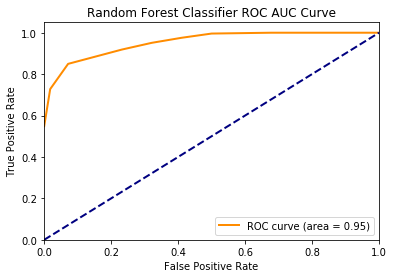

In [10]:
# Plot ROC Curve
roc = roc_curve(y_test, y_prob)
fpr, tpr, thresholds = roc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()